In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utils_comp as utils
import utils_max_flow
import utils_centrality
import pickle

### Load data from 'N-k_CENTRALITY.ipynb' and 'N-k_MAX_FLOW.ipynb'

In [2]:
centrality_random_node_removal_df = pd.read_pickle('results/centrality/iggielgn/random_node_removal.pkl')
centrality_greedy_node_removal_df = pd.read_pickle('results/centrality/iggielgn/greedy_node_removal.pkl')

max_flow_random_node_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/random_node_removal_df.pkl')
max_flow_greedy_node_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/wfcr_node_removal_df.pkl')

centrality_random_edge_removal_df = pd.read_pickle('results/centrality/iggielgn/random_edge_removal.pkl')
centrality_greedy_edge_removal_df = pd.read_pickle('results/centrality/iggielgn/greedy_edge_removal.pkl')

max_flow_random_edge_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/random_edge_removal_df.pkl')
max_flow_greedy_edge_removal_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/wfcr_edge_removal_df.pkl')

In [3]:
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed' 

# Direct comparison of index 

### Node

AUC for NPI: 14.92
NPI: [max ROC: 3.13695, avg ROC: 1.49694]

AUC for NPI: 27.6
NPI: [max ROC: 0.38893, avg ROC: 0.38342]

AUC for capacity_robustness_max_flow: 3.21
capacity_robustness_max_flow: [max ROC: 7.98174, avg ROC: 3.46102]

AUC for capacity_robustness_max_flow: 37.18
capacity_robustness_max_flow: [max ROC: 0.18666, avg ROC: 0.08303]



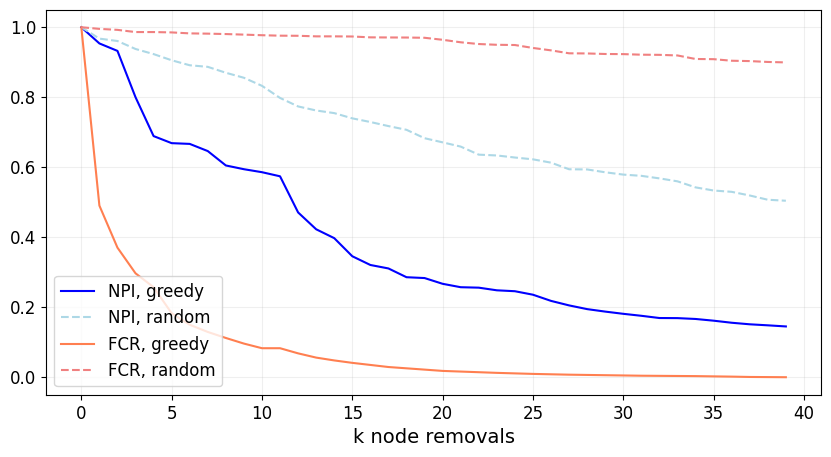

In [4]:
utils.plot_direct_comparison(centrality_greedy_node_removal_df, centrality_random_node_removal_df, max_flow_greedy_node_removal_df, max_flow_random_node_removal_df)

In [5]:
utils.common_entities(centrality_greedy_node_removal_df, max_flow_greedy_node_removal_df)

2 common entity removals
39 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 16.0
Variance of index differences for random (averaged) node removal: 514643.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
1,SEQ_369__L_LMGN,16,2,14
0,N_193_M_LMGN,30,8,22


### Edge

AUC for NPI: 16.82
NPI: [max ROC: 3.68635, avg ROC: 1.57809]

AUC for NPI: 36.36
NPI: [max ROC: 0.30451, avg ROC: 0.21351]

AUC for capacity_robustness_max_flow: 5.22
capacity_robustness_max_flow: [max ROC: 4.54990, avg ROC: 1.94537]

AUC for capacity_robustness_max_flow: 48.48
capacity_robustness_max_flow: [max ROC: 0.29214, avg ROC: 0.12483]



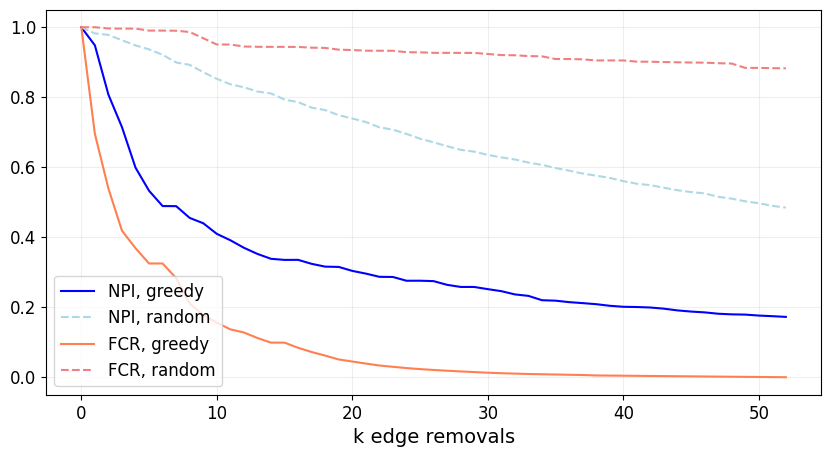

In [6]:
utils.plot_direct_comparison(centrality_greedy_edge_removal_df, centrality_random_edge_removal_df, max_flow_greedy_edge_removal_df, max_flow_random_edge_removal_df)

In [7]:
# Ignore SettingWithCopyWarning
pd.options.mode.chained_assignment = None

corrected_centrality_greedy_edge_removal_df = centrality_greedy_edge_removal_df.iloc[1:]
corrected_centrality_greedy_edge_removal_df['removed_entity'] = corrected_centrality_greedy_edge_removal_df['removed_entity'].apply(lambda edge: tuple(edge))
for i in range(len(corrected_centrality_greedy_edge_removal_df)):
    if corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i] not in G_simple_directed.edges():
        corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i] = (corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i][1], corrected_centrality_greedy_edge_removal_df['removed_entity'].iloc[i][0])

corrected_max_flow_greedy_edge_removal_df = max_flow_greedy_edge_removal_df.iloc[1:]
corrected_max_flow_greedy_edge_removal_df['removed_entity'] = corrected_max_flow_greedy_edge_removal_df['removed_entity'].apply(lambda edge: tuple(edge))
for i in range(len(corrected_max_flow_greedy_edge_removal_df)):
    if corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i] not in G_simple_directed.edges():
        corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i] = (corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i][1], corrected_max_flow_greedy_edge_removal_df['removed_entity'].iloc[i][0])
        

In [8]:
utils.common_entities(corrected_centrality_greedy_edge_removal_df, corrected_max_flow_greedy_edge_removal_df)

4 common entity removals
51 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 64.0
Variance of index differences for random (averaged) node removal: 79001.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
2,"(N_539_M_LMGN, SEQ_7053__M_LMGN)",12,10,2
3,"(SEQ_8285__L_LMGN, SEQ_2025__L_LMGN)",22,16,6
1,"(SEQ_369__L_LMGN, SEQ_373__L_LMGN)",10,3,7
0,"(SEQ_10361__M_LMGN, N_183_L_LMGN)",29,6,23


# Transformation between 'domains'

In [9]:
# Limit to 100 removed entities
centrality_greedy_node_removal_df = centrality_greedy_node_removal_df.iloc[:101]
centrality_greedy_edge_removal_df = centrality_greedy_edge_removal_df.iloc[:101]

In [10]:
centrality_greedily_removed_nodes_lst = centrality_greedy_node_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_nodes_lst = max_flow_greedy_node_removal_df['removed_entity'].dropna().tolist()

centrality_greedily_removed_edges_lst = centrality_greedy_edge_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_edges_lst = max_flow_greedy_edge_removal_df['removed_entity'].dropna().tolist()

In [11]:
# Correct directionality of edges
centrality_greedily_removed_edges_lst = utils.correct_edges([tuple(e) for e in centrality_greedily_removed_edges_lst])
max_flow_greedily_removed_edges_lst = utils.correct_edges([tuple(e) for e in max_flow_greedily_removed_edges_lst])

### Max flow based N-k analysis employing greedy entity removal order resulting from centrality analysis

In [12]:
#centrality_greedily_removed_nodes_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='node', greedy_centrality_lst=centrality_greedily_removed_nodes_lst)
#centrality_greedily_removed_nodes_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_nodes_max_flow_df.pkl')
centrality_greedily_removed_nodes_max_flow_df = pd.read_pickle('results/comparison/centrality_greedily_removed_nodes_max_flow_df.pkl')

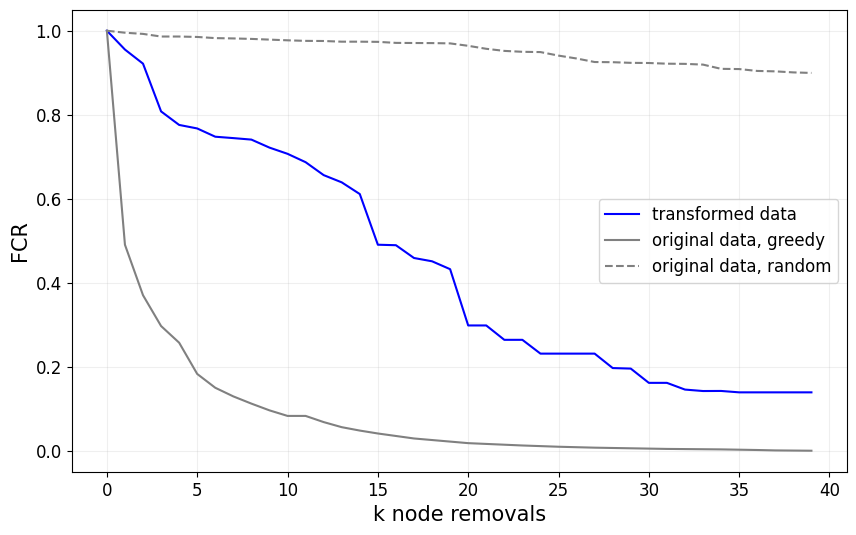

<Figure size 640x480 with 0 Axes>

In [13]:
fig = utils.plot_transform_comparison(centrality_greedily_removed_nodes_max_flow_df, max_flow_greedy_node_removal_df, max_flow_random_node_removal_df, 'capacity_robustness_max_flow')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/FCR_using_greedy_nodes_NPI.png', bbox_inches='tight', pad_inches=0)

In [14]:
#centrality_greedily_removed_edges_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='edge', greedy_centrality_lst=centrality_greedily_removed_edges_lst)
#centrality_greedily_removed_edges_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl')
centrality_greedily_removed_edges_max_flow_df = pd.read_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl')

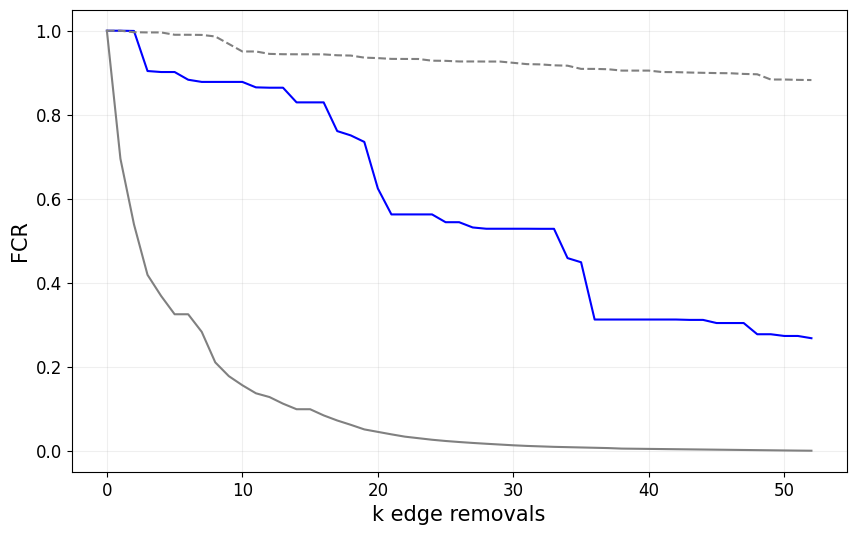

<Figure size 640x480 with 0 Axes>

In [15]:
fig = utils.plot_transform_comparison(centrality_greedily_removed_edges_max_flow_df, max_flow_greedy_edge_removal_df, max_flow_random_edge_removal_df, 'capacity_robustness_max_flow')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/FCR_using_greedy_edges_NPI.png', bbox_inches='tight', pad_inches=0)

### Centrality based N-k analysis employing greedy entity removal order resulting from max flow analysis

In [16]:
#max_flow_greedily_removed_nodes_centrality_df = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='node', greedy_max_flow_lst=max_flow_greedily_removed_nodes_lst)
#max_flow_greedily_removed_nodes_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_nodes_centrality_df.pkl')
max_flow_greedily_removed_nodes_centrality_df = pd.read_pickle('results/comparison/max_flow_greedily_removed_nodes_centrality_df.pkl')

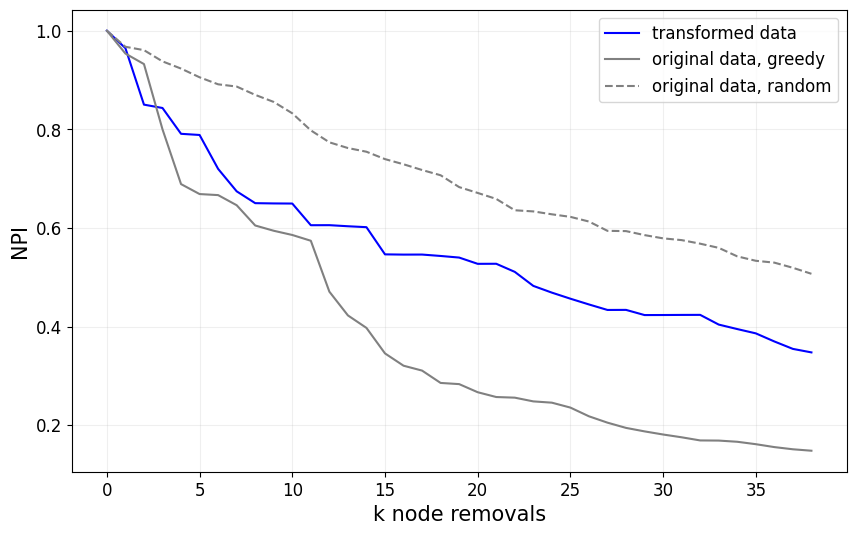

<Figure size 640x480 with 0 Axes>

In [23]:
fig = utils.plot_transform_comparison(max_flow_greedily_removed_nodes_centrality_df, centrality_greedy_node_removal_df, centrality_random_node_removal_df, 'NPI')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/NPI_using_greedy_nodes_FCR.png', bbox_inches='tight', pad_inches=0)

In [18]:
#max_flow_greedily_removed_edges_centrality_df = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='edge', greedy_max_flow_lst=max_flow_greedily_removed_edges_lst)
#max_flow_greedily_removed_edges_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_edges_centrality_df.pkl')
max_flow_greedily_removed_edges_centrality_df = pd.read_pickle('results/comparison/max_flow_greedily_removed_edges_centrality_df.pkl')

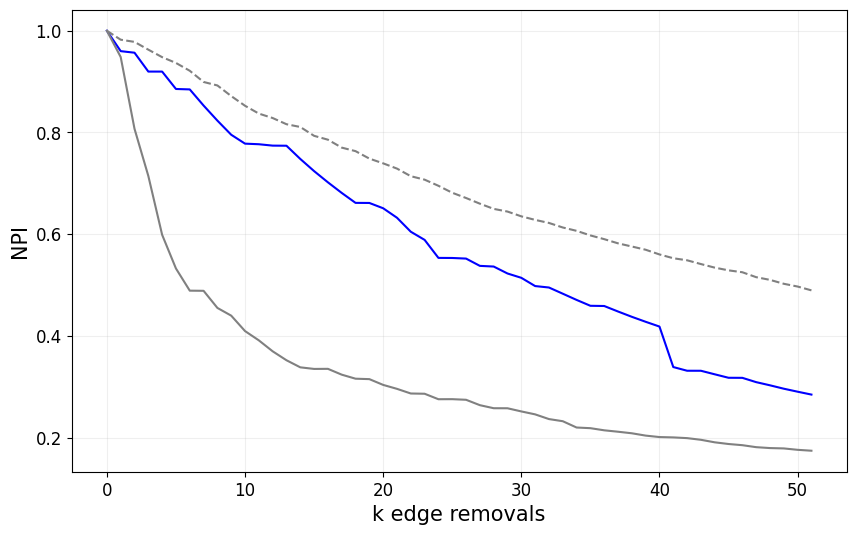

<Figure size 640x480 with 0 Axes>

In [21]:
fig = utils.plot_transform_comparison(max_flow_greedily_removed_edges_centrality_df, centrality_greedy_edge_removal_df, centrality_random_edge_removal_df, 'NPI')
plt.savefig('saved_plots/iggielgn/hybrid/comparison/NPI_using_greedy_edges_FCR.png', bbox_inches='tight', pad_inches=0)